In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
#import random
%matplotlib inline
from matplotlib import animation
from matplotlib.widgets import Slider
from ipywidgets import interact, interactive, fixed
import scipy.integrate as integrate

from matplotlib import animation
from IPython.display import HTML

In [2]:
b=1/np.sqrt(integrate.quad(lambda x: (0.25-x**2)**2, -1/2, 1/2)[0])
b

5.4772255750516612

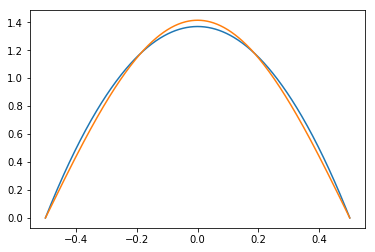

In [3]:
a=1
x_s=500
x = np.linspace(-a/2, a/2, x_s)
psi1=b*(0.25-x**2)
u1 = np.sqrt(2)*np.cos(np.pi*x)
plt.plot(x, psi1,x,u1) 

In [9]:
num=16;
A_n=np.zeros(num)
for i in range(num):
    if i%2 == 0:
        A_n[i] = integrate.quad(lambda x: b*(0.25-x**2)*np.sqrt(2)*np.sin(i*np.pi*x), -0.5, 0.5)[0];
    else:
        A_n[i] = integrate.quad(lambda x: b*(0.25-x**2)*np.sqrt(2)*np.cos(i*np.pi*x), -0.5, 0.5)[0];
        
A_n**2


array([  0.00000000e+00,   9.98555014e-01,   0.00000000e+00,
         1.36975996e-03,   0.00000000e+00,   6.39075209e-05,
         0.00000000e+00,   8.48757758e-06,   0.00000000e+00,
         1.87895743e-06,   0.00000000e+00,   5.63658273e-07,
         0.00000000e+00,   2.06876844e-07,   0.00000000e+00,
         8.76646377e-08])

In [5]:
np.sum(A_n**2)

0.99999990658453197

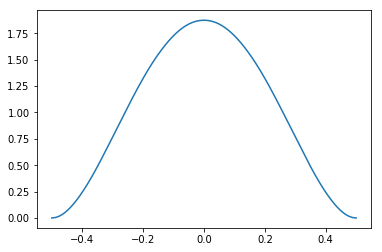

In [6]:
a=1
x_s=500
x = np.linspace(-a/2, a/2, x_s)
psi=0*x
t=0

for i in range(num):
    if i%2 == 0:
        pass
        #psi=psi+A_n[i]*np.sqrt(2)*np.sin(i*np.pi*x)*np.exp(1j*np.pi**2*t*i*i/2)
    else:
        psi=psi+A_n[i]*np.sqrt(2)*np.cos(i*np.pi*x)*np.exp(1j*np.pi**2*t*i*i/2)
        
prob=psi*np.conj(psi)      
plt.plot(x,np.real(prob))

In [7]:
myfigsize=(8,6)

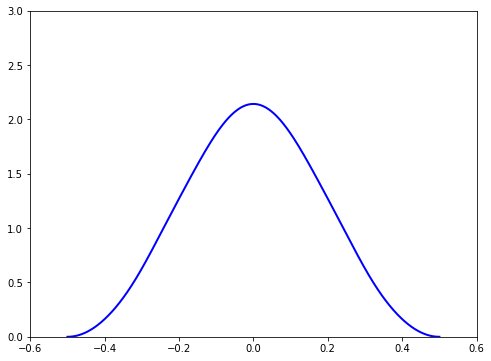

In [8]:
outerlim = 0.6
fig = plt.figure(figsize=myfigsize)
ax = plt.axes(xlim=(-outerlim, outerlim), ylim=(0, 3))
line, = ax.plot([], [], lw=2, color='blue')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially

a=1
x_s=500
tstep=10

def animate(t):
    x = np.linspace(-a/2, a/2, x_s)
    psi=0*x
    for i in range(num):
        if i%2 == 0:
            psi=psi+A_n[i]*np.sqrt(2)*np.sin(i*np.pi*x)*np.exp(-1j*np.pi**2*t*i*i/tstep)
        else:
            psi=psi+A_n[i]*np.sqrt(2)*np.cos(i*np.pi*x)*np.exp(-1j*np.pi**2*t*i*i/tstep)
        
        y=np.real(psi*np.conj(psi) )     

    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)
HTML(ani.to_jshtml())
#ani